In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/EURUSD_with_indicators.csv", parse_dates=["datetime"])

In [2]:
df["signal"] = "Hold"

In [3]:
i = 0
while i < len(df) - 3:
    if df.loc[i + 3, "<CLOSE>"] > df.loc[i, "<CLOSE>"]:
        df.loc[i, "signal"] = "Buy"
        df.loc[i+1:i+2, "signal"] = "Buy_Hold"
        i += 3  # skip το μοτίβο
    elif df.loc[i + 3, "<CLOSE>"] < df.loc[i, "<CLOSE>"]:
        df.loc[i, "signal"] = "Sell"
        df.loc[i+1:i+2, "signal"] = "Sell_Hold"
        i += 3
    else:
        i += 1

In [4]:
for j in range(1, len(df) - 1):
    if df.loc[j, "signal"] == "Buy" and df.loc[j - 1, "signal"] == "Buy_Hold" and df.loc[j + 1, "signal"] == "Buy_Hold":
        df.loc[j, "signal"] = "Buy_Hold"
    if df.loc[j, "signal"] == "Sell" and df.loc[j - 1, "signal"] == "Sell_Hold" and df.loc[j + 1, "signal"] == "Sell_Hold":
        df.loc[j, "signal"] = "Sell_Hold"

In [5]:
print(df["signal"].value_counts())

signal
Sell_Hold    957
Buy_Hold     949
Sell         201
Buy          200
Hold           2
Name: count, dtype: int64


In [6]:
df.to_csv("../data/EURUSD_with_signals.csv", index=False)

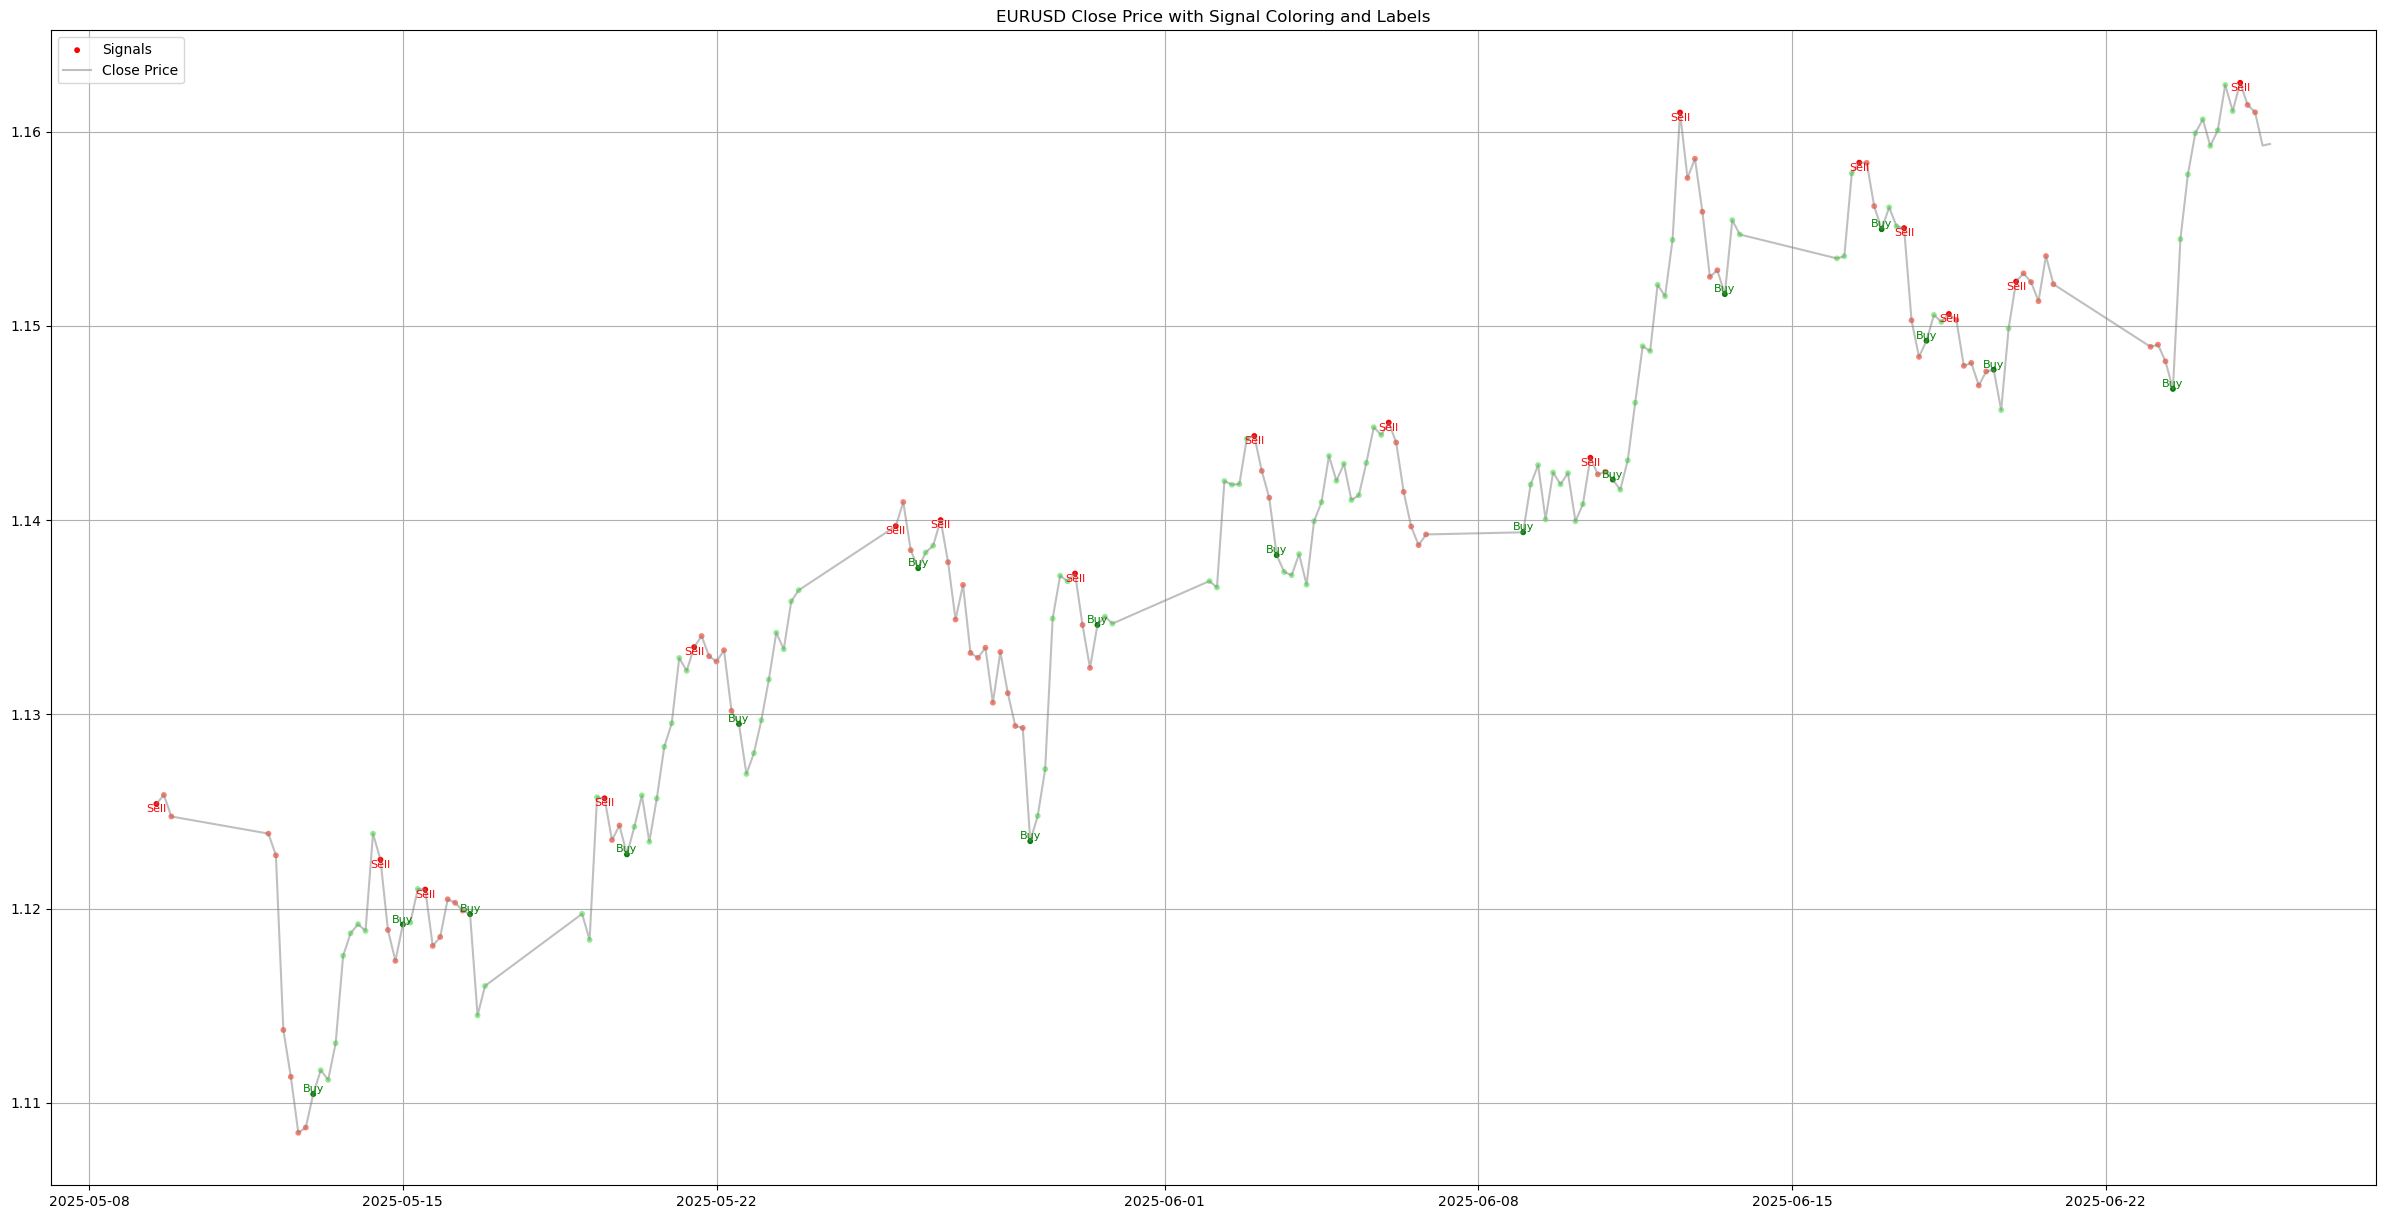

In [7]:
df.set_index("datetime", inplace=True)
plot_df = df.iloc[-200:].copy()

colors = plot_df["signal"].map({
    "Buy": "green",
    "Buy_Hold": "lightgreen",
    "Sell": "red",
    "Sell_Hold": "salmon",
    "Hold": "white"
})

fig, ax = plt.subplots(figsize=(30, 15))
ax.scatter(plot_df.index, plot_df["<CLOSE>"], c=colors, label="Signals", s=10)
ax.plot(plot_df.index, plot_df["<CLOSE>"], color="gray", alpha=0.5, label="Close Price")

# Προσθήκη ετικετών για Buy/Sell σημεία
for i, row in plot_df.iterrows():
    if row["signal"] == "Buy":
        ax.text(i, row["<CLOSE>"], "Buy", color="green", fontsize=8, ha="center", va="bottom")
    elif row["signal"] == "Sell":
        ax.text(i, row["<CLOSE>"], "Sell", color="red", fontsize=8, ha="center", va="top")

ax.set_title("EURUSD Close Price with Signal Coloring and Labels")
ax.legend()
plt.grid(True)
plt.show()

In [8]:
print(df)

                      <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>     ema_5  \
datetime                                                                       
2024-01-02 00:00:00  1.10424  1.10443  1.10341  1.10349       4438       NaN   
2024-01-02 04:00:00  1.10350  1.10360  1.10165  1.10334       5889       NaN   
2024-01-02 08:00:00  1.10336  1.10388  1.10106  1.10152      13826       NaN   
2024-01-02 12:00:00  1.10151  1.10171  1.09494  1.09527      18275       NaN   
2024-01-02 16:00:00  1.09527  1.09683  1.09408  1.09506      22154  1.098547   
...                      ...      ...      ...      ...        ...       ...   
2025-06-25 00:00:00  1.16072  1.16267  1.16034  1.16251       4985  1.160998   
2025-06-25 04:00:00  1.16251  1.16313  1.16109  1.16137       7430  1.161122   
2025-06-25 08:00:00  1.16138  1.16226  1.15899  1.16099       9715  1.161078   
2025-06-25 12:00:00  1.16098  1.16133  1.15901  1.15928       8906  1.160479   
2025-06-25 16:00:00  1.15928  1.15953  1